### The problem sttement is to predict the temperature of Algerian forest based on various factors

### column information
- Date : Day, month , year 
- Temp : temperature in Celsius degrees
- RH   : Relative Humidity in %
- Ws   :Wind speed in km/h
- Rain : total day in mm
- FFMC :Fine Fuel Moisture Code 
- DMC  :Duff Moisture Code 
- DC   :Drought Code 
- ISI  :Initial Spread Index
- BUI  :Buildup Index
- FWI  :Fire Weather Index
- fire_status: two classes, namely Fire and not Fire
- region : Bejaia Region Dataset as 1 , Sidi-Bel Abbes Region Dataset as 2

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data from csv file , we know that data belongs to two region so ignore the region cells 
df=pd.read_csv(r'Algerian_forest_fires_dataset.csv',header=1)

In [3]:
#display top 5 rows
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Data cleaning

In [4]:
#there is aduplicate header row and region cell in data need to be remove
df[df['day']=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [5]:
df.loc[122:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [6]:
#As we can see there are 3 rows with bad data need to be dropped
df.drop([122,123,124],inplace=True)

In [7]:
#reset the index
df.reset_index(drop=True,inplace=True)

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [10]:
#There are unecessary spaces in colums remove them
df.columns=df.columns.str.strip()

In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### There are two regions data in the file let's create a numerical columns to distinguish them
- Bejaia Region Dataset as 1
- Sidi-Bel Abbes Region Dataset as 2

In [13]:
df['region']=0
df.loc[:122,'region']=1
df.loc[122:,'region']=2

In [14]:
df.loc[[121,122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2


In [15]:
#let's check for columns data types
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
region          int64
dtype: object

In [16]:
#before converting the necessary dtypes as the data belongs to same yaer let's combine day,month,year columns
df['date']=df['day']+'-'+df['month']+'-'+df['year']

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,1-6-2012
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1,2-6-2012
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,3-6-2012
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1,4-6-2012
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1,5-6-2012


In [18]:
#drop the day,month,year columns
df.drop(['day','month','year'],axis=1,inplace=True)

In [19]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,1-6-2012
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1,2-6-2012
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,3-6-2012
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1,4-6-2012
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1,5-6-2012


In [20]:
df.dtypes

Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
region          int64
date           object
dtype: object

In [21]:
#cjeck for unique elements
for i in df.columns:
    print(f'{i} has {df[i].nunique()} data')

Temperature has 19 data
RH has 62 data
Ws has 18 data
Rain has 39 data
FFMC has 173 data
DMC has 166 data
DC has 198 data
ISI has 106 data
BUI has 174 data
FWI has 126 data
Classes has 8 data
region has 2 data
date has 122 data


In [22]:
#let's check for classes 
df['Classes']

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
239         fire   
240     not fire   
241     not fire   
242     not fire   
243    not fire    
Name: Classes, Length: 244, dtype: object

In [23]:
#we can see uneven spaces in classes let's remove them
df['Classes']=df['Classes'].str.strip()

In [24]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [25]:
#let's one hpot encode the categorical column
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder(drop='first',sparse=False)

In [26]:
df['Classes']=one.fit_transform(df['Classes'].to_numpy().reshape(-1, 1))

In [27]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,1,1-6-2012
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,1.0,1,2-6-2012
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,1,3-6-2012
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1.0,1,4-6-2012
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,1.0,1,5-6-2012


In [28]:
df.dtypes

Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes        float64
region           int64
date            object
dtype: object

In [29]:
#extract object dtypes and convert to numeric
columns_to_converted=[ cat for cat in df.columns if df[cat].dtype == 'O']

In [30]:
columns_to_converted

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'date']

In [31]:
for i in columns_to_converted:
    if i!='date':
        df[i]=pd.to_numeric(df[i],errors='coerce')

In [32]:
df.dtypes

Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes        float64
region           int64
date            object
dtype: object

In [33]:
#change dtype of date
df['date']=pd.to_datetime(df['date'])

In [34]:
df.dtypes

Temperature             int64
RH                      int64
Ws                      int64
Rain                  float64
FFMC                  float64
DMC                   float64
DC                    float64
ISI                   float64
BUI                   float64
FWI                   float64
Classes               float64
region                  int64
date           datetime64[ns]
dtype: object

In [35]:
#let's consider region and classe as categoriical columns becoz they have only 2 unique values which are encoded
cat_cols=['region','classes']
num_cols=[cat for cat in df.columns if (cat not in cat_cols) ]

In [36]:
num_cols

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'date']

In [37]:
#check for null values
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Classes        0
region         0
date           0
dtype: int64

In [38]:
#since DC and FWI has only 1 null value drop them
df.dropna(inplace=True)

In [39]:
df.isnull().sum().sum()

0

In [40]:
#check for duplicates
df.duplicated().sum()

0

#### there are no duplicate values

In [41]:
df.shape

(243, 13)

#### 12 input columns 1 output 

In [42]:
df.memory_usage()

Index          1944
Temperature    1944
RH             1944
Ws             1944
Rain           1944
FFMC           1944
DMC            1944
DC             1944
ISI            1944
BUI            1944
FWI            1944
Classes        1944
region         1944
date           1944
dtype: int64

## statistical analysis

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0
BUI,243.0,16.690535,14.228421,1.1,6.00,12.4,22.65,68.0
FWI,243.0,7.035391,7.440568,0.0,0.70,4.2,11.45,31.1


#### Graph analysis

In [44]:
num_cols


['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'date']

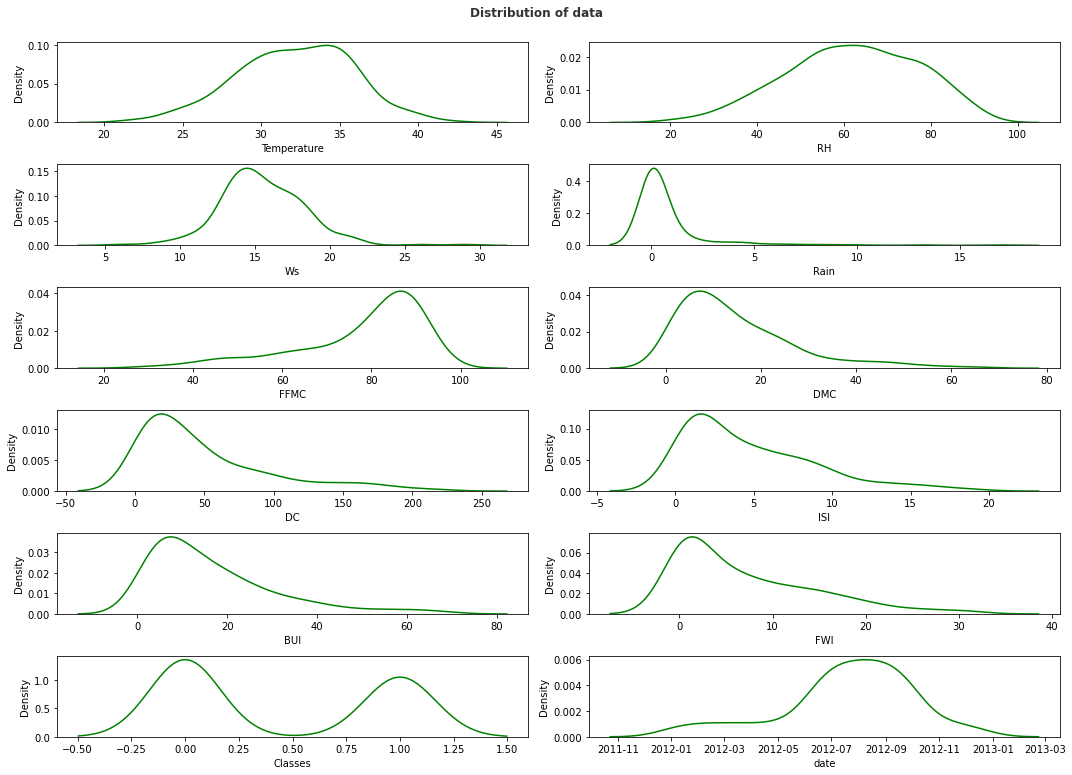

In [45]:
plt.figure(figsize=(15,12))
plt.suptitle("Distribution of data",fontsize=12,fontweight='bold',alpha=0.8, y=1)
i=1
for cat in num_cols:
    plt.subplot(7,2,i)
    sns.kdeplot(df[cat],color='g')
    plt.tight_layout()
    i+=1

- rain , DMC , DC, ISI ,BUI , FWI are positively skewed use transformation 
- FFMC is negative skewed

In [46]:
num_cols.remove('date')

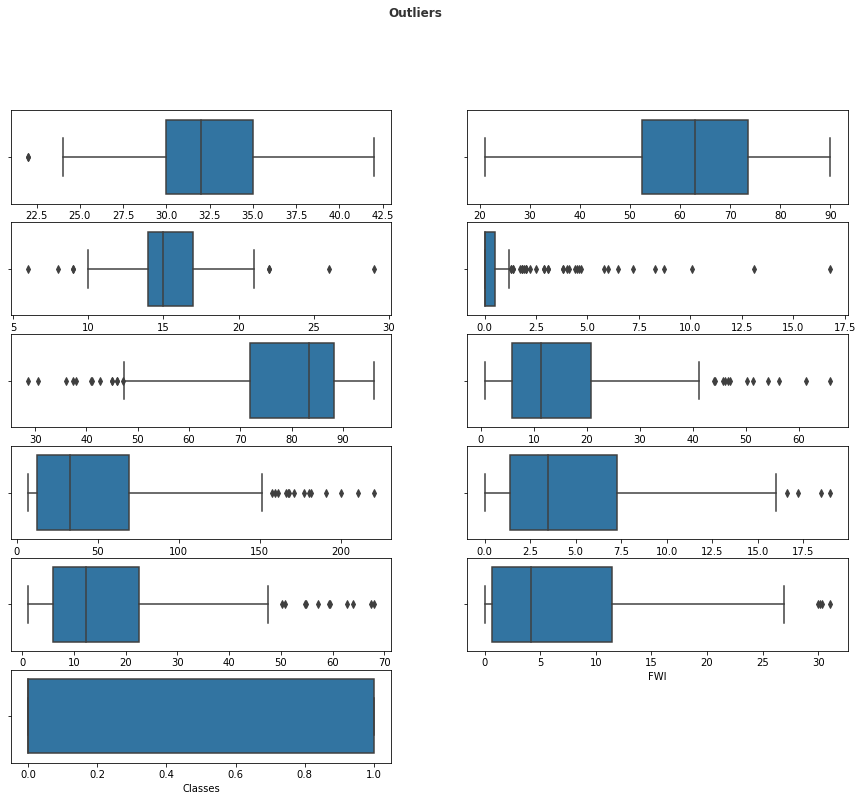

In [47]:
# check for outliers
plt.figure(figsize=(15,12))
plt.suptitle("Outliers",fontsize=12,fontweight='bold',alpha=0.8, y=1)
i=1
for cat in num_cols:
    plt.subplot(6,2,i)
    sns.boxplot(x=df[cat],orient='h')
    i+=1

In [48]:
#check for correlation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,-0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,-0.719216,0.197102


<AxesSubplot:xlabel='BUI', ylabel='DC'>

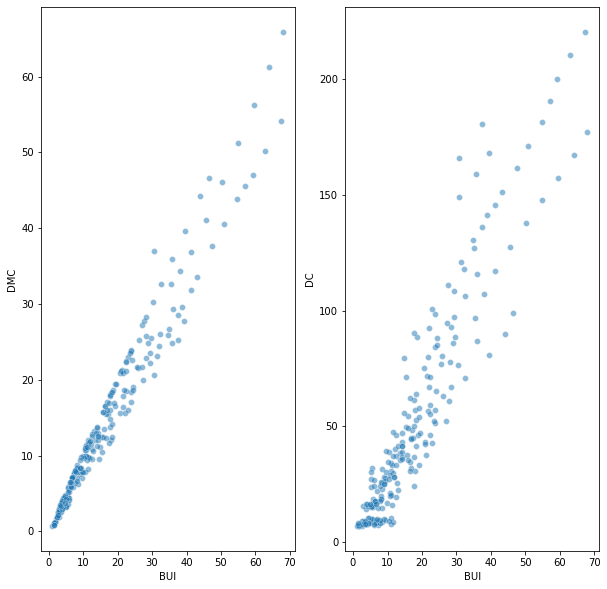

In [49]:
### BUI, DMC, DC are above 90% correlate, check with scatter plot
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.scatterplot(df['BUI'],df['DMC'],alpha=0.5)
plt.subplot(1,2,2)
sns.scatterplot(df['BUI'],df['DC'],alpha=0.5)

- The Build Up Index (BUI) is a numeric rating of the total amount of fuel available for combustion. 
- It combines the DMC and the DC
- 98% of DMC and 94% of DC are explained by BUI
- so drop remaining 2 columns

In [50]:
df.drop(['DMC','DC'],axis=1,inplace=True)

In [51]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,1.3,3.4,0.5,1.0,1,2012-01-06
1,29,61,13,1.3,64.4,1.0,3.9,0.4,1.0,1,2012-02-06
2,26,82,22,13.1,47.1,0.3,2.7,0.1,1.0,1,2012-03-06
3,25,89,13,2.5,28.6,0.0,1.7,0.0,1.0,1,2012-04-06
4,27,77,16,0.0,64.8,1.2,3.9,0.5,1.0,1,2012-05-06


In [52]:
df.shape

(243, 11)

In [53]:
df_copy=df.copy()

In [54]:
#let convert the distribution to normal and see if outliers are handled
from sklearn.preprocessing import PowerTransformer
tranform = PowerTransformer(method='yeo-johnson')
a=tranform.fit_transform(df[['Rain','ISI','BUI','FWI','FFMC']])

In [55]:
df_transform =pd.DataFrame(a,columns=['Rain','ISI','BUI','FWI','FFMC'])

In [56]:
df_transform

,Rain,ISI,BUI,FWI,FFMC
0,-0.780422,-0.875297,-1.310657,-1.134337,-1.143877
1,1.548807,-1.056222,-1.185327,-1.199021,-1.210572
2,1.935988,-1.606598,-1.510946,-1.424573,-1.782670
3,1.793657,-1.936480,-1.870536,-1.513480,-1.981755
4,-0.780422,-0.932968,-1.185327,-1.134337,-1.190476
...,...,...,...,...,...
238,-0.780422,0.280034,0.379978,0.394595,0.468572
239,1.887717,-1.817104,-0.731379,-1.513480,-1.879214
240,0.880728,-1.512694,-1.310657,-1.343292,-1.805188
241,-0.239626,-0.666289,-0.928062,-1.016812,-0.131116


In [57]:
def plot(df,cols):
    sns.set_style('whitegrid')
    plt.subplot(1,2,1)
    sns.kdeplot(df[cols],shade=True,color='g')
    plt.subplot(1,2,2)
    sns.boxplot(df[cols])
    plt.tight_layout()

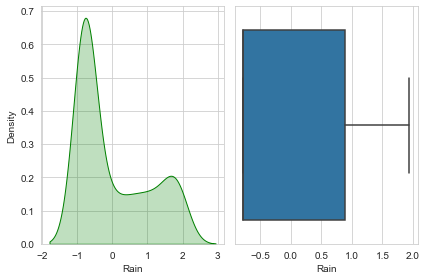

In [58]:
plot(df_transform,'Rain')

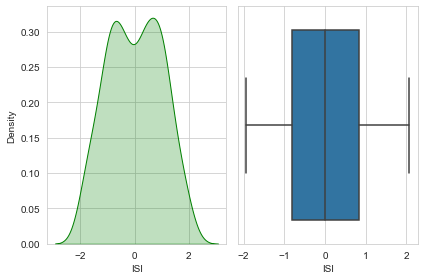

In [59]:
plot(df_transform,'ISI')

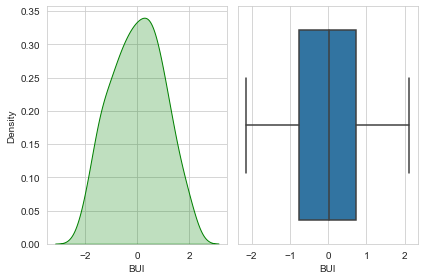

In [60]:
plot(df_transform,'BUI')

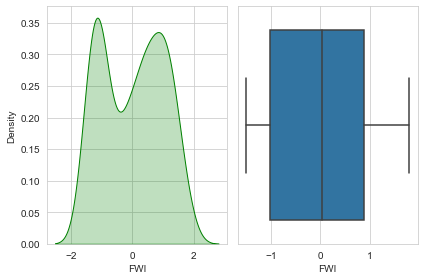

In [61]:
plot(df_transform,'FWI')

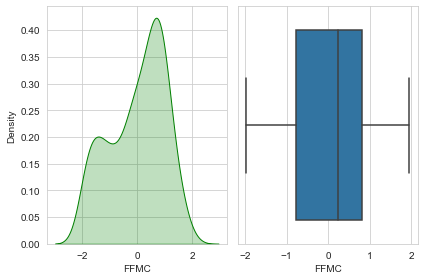

In [62]:
plot(df_transform,'FFMC')

In [63]:
from sklearn.preprocessing import FunctionTransformer
tranform = FunctionTransformer(np.sqrt)
b=tranform.fit_transform(df[['Rain','ISI','BUI','FWI','FFMC']])

In [64]:
data=pd.DataFrame(b,columns=['Rain','ISI','BUI','FWI','FFMC'])

In [65]:
data.head()

,Rain,ISI,BUI,FWI,FFMC
0,0.000000,1.140175,1.843909,0.707107,8.105554
1,1.140175,1.000000,1.974842,0.632456,8.024961
2,3.619392,0.547723,1.643168,0.316228,6.862944
3,1.581139,0.000000,1.303840,0.000000,5.347897
4,0.000000,1.095445,1.974842,0.707107,8.049845


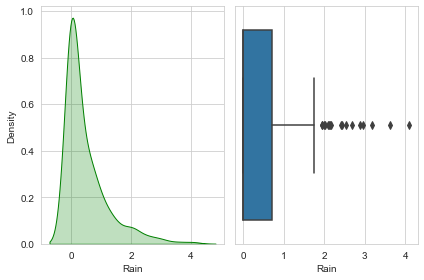

In [66]:
plot(data,'Rain')

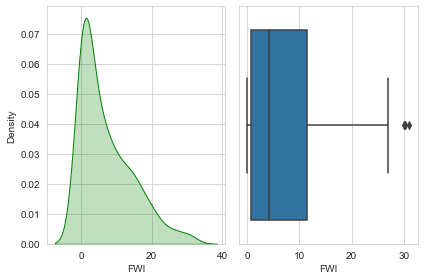

In [67]:
plot(df_copy,'FWI')

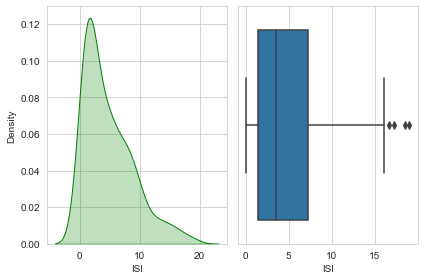

In [68]:
plot(df_copy,'ISI')

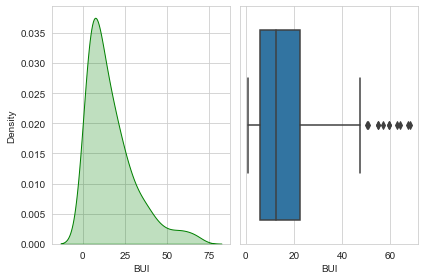

In [69]:
plot(df_copy,'BUI')

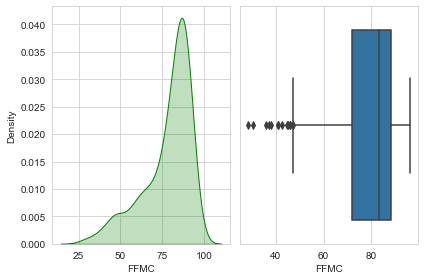

In [70]:
plot(df_copy,'FFMC')

In [71]:
from sklearn.preprocessing import FunctionTransformer
tranform = FunctionTransformer(np.reciprocal)
c=tranform.fit_transform(df[['Rain','ISI','BUI','FWI','FFMC']])

In [72]:
data_reciprocal=pd.DataFrame(b,columns=['Rain','ISI','BUI','FWI','FFMC'])

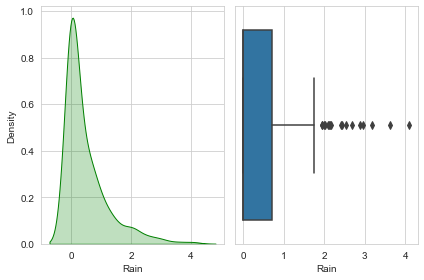

In [73]:
plot(data_reciprocal,'Rain')

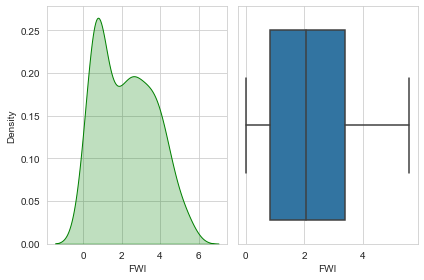

In [74]:
plot(data_reciprocal,'FWI')

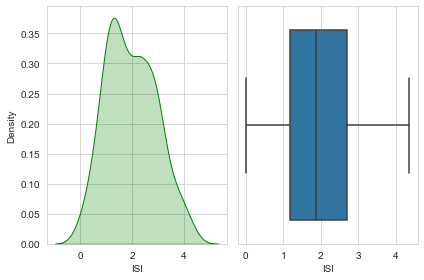

In [75]:
plot(data_reciprocal,'ISI')

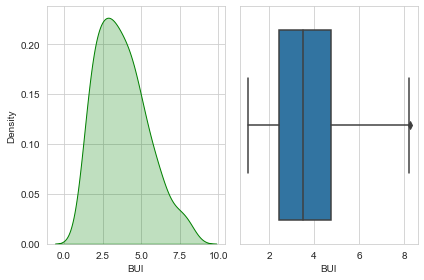

In [76]:
plot(data_reciprocal,'BUI')

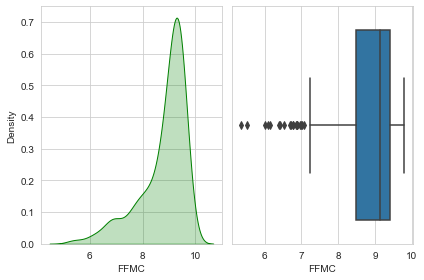

In [77]:
plot(data_reciprocal,'FFMC')

In [78]:
df_copy['Rain']=np.where(df_copy['Rain'] == 0.0,0.1,df_copy['Rain'])
df_copy['FWI']=np.where(df_copy['FWI'] == 0.0,0.1,df_copy['FWI'])

In [79]:
from sklearn.preprocessing import PowerTransformer
tranform = PowerTransformer('box-cox')
f=tranform.fit_transform(df_copy[['Rain','FWI','FFMC']])

In [80]:
df_boxcox=pd.DataFrame(f,columns=['Rain','FWI','FFMC'])

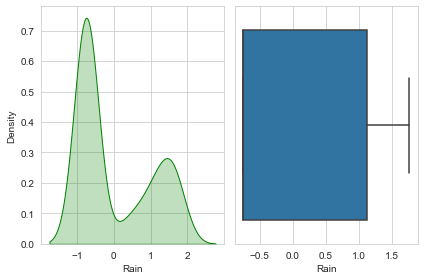

In [81]:
plot(df_boxcox,'Rain')

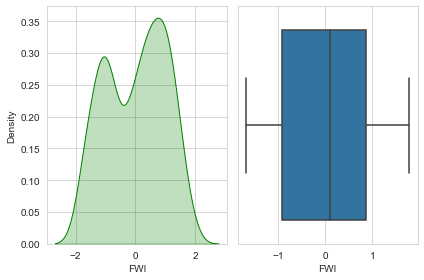

In [82]:
plot(df_boxcox,'FWI')

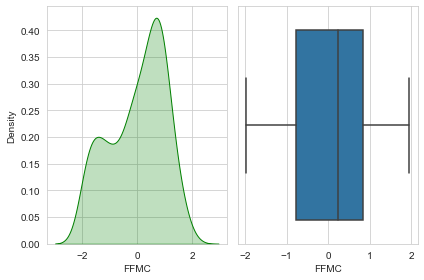

In [83]:
plot(df_boxcox,'FFMC')

In [84]:
from sklearn.preprocessing import FunctionTransformer
tranform = FunctionTransformer(np.log)
g=tranform.fit_transform(df[['FWI','Rain','FFMC']])

In [85]:
df_log=pd.DataFrame(g,columns=['FWI','Rain','FFMC'])

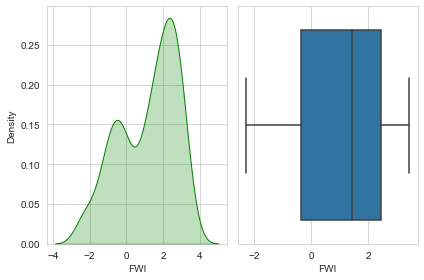

In [86]:
plot(df_log,'FWI')

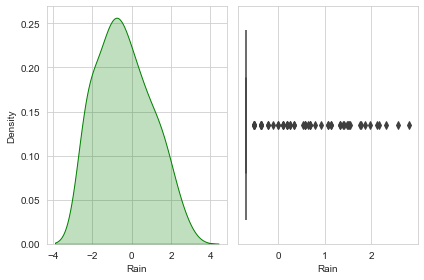

In [87]:
plot(df_log,'Rain')

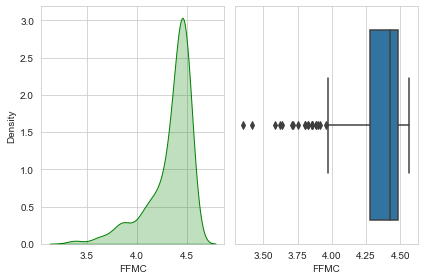

In [88]:
plot(df_log,'FFMC')

In [89]:
df.to_csv(r'Algerian_cleaned.csv')

- yeo-jhonson transformation providing best result for isi,bui, ffmc,fwi 
- rain has 0 values if we replace 0 with 0.1 and do logarithmic transformation, distribution is converted to normal distribution but outliers are increasing 
- so keep rain as it is

In [90]:
df[['ISI','BUI','FWI','FFMC']]=df_transform[['ISI','BUI','FWI','FFMC']]

In [91]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,-1.143877,-0.875297,-1.310657,-1.134337,1.0,1,2012-01-06
1,29,61,13,1.3,-1.210572,-1.056222,-1.185327,-1.199021,1.0,1,2012-02-06
2,26,82,22,13.1,-1.782670,-1.606598,-1.510946,-1.424573,1.0,1,2012-03-06
3,25,89,13,2.5,-1.981755,-1.936480,-1.870536,-1.513480,1.0,1,2012-04-06
4,27,77,16,0.0,-1.190476,-0.932968,-1.185327,-1.134337,1.0,1,2012-05-06


<AxesSubplot:xlabel='date', ylabel='Temperature'>

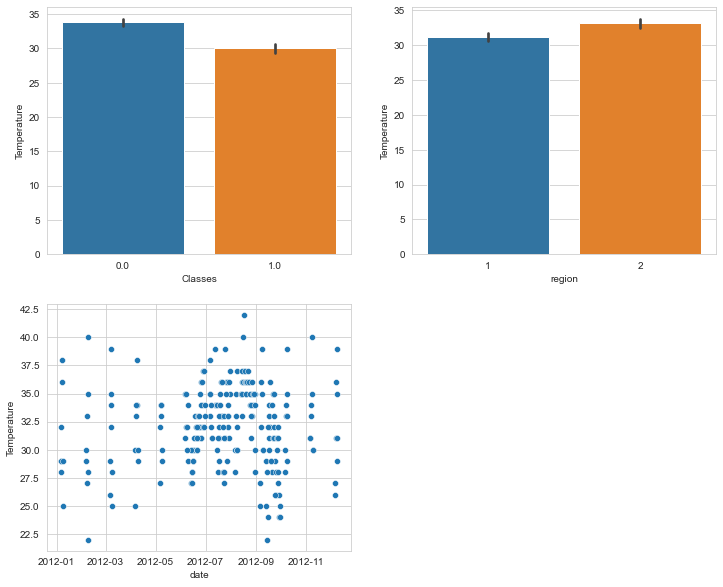

In [92]:
plt.figure(figsize=(12,10))
sns.set_style('whitegrid')
plt.subplot(2,2,1)
sns.barplot(df['Classes'],df['Temperature'])
plt.subplot(2,2,2)
sns.barplot(df['region'],df['Temperature'])
plt.subplot(2,2,3)
sns.scatterplot(df['date'],df['Temperature'])

In [93]:
#date and temperature has no r'ship drop the column
df.drop('date',axis=1,inplace=True)

In [94]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,-1.143877,-0.875297,-1.310657,-1.134337,1.0,1
1,29,61,13,1.3,-1.210572,-1.056222,-1.185327,-1.199021,1.0,1
2,26,82,22,13.1,-1.782670,-1.606598,-1.510946,-1.424573,1.0,1
3,25,89,13,2.5,-1.981755,-1.936480,-1.870536,-1.513480,1.0,1
4,27,77,16,0.0,-1.190476,-0.932968,-1.185327,-1.134337,1.0,1


In [95]:
numeric_cols=set(num_cols)-set(['DMC','DC','Classes','Temperature'])
numeric_cols=list(numeric_cols)
numeric_cols

['FWI', 'Ws', 'ISI', 'RH', 'Rain', 'BUI', 'FFMC']

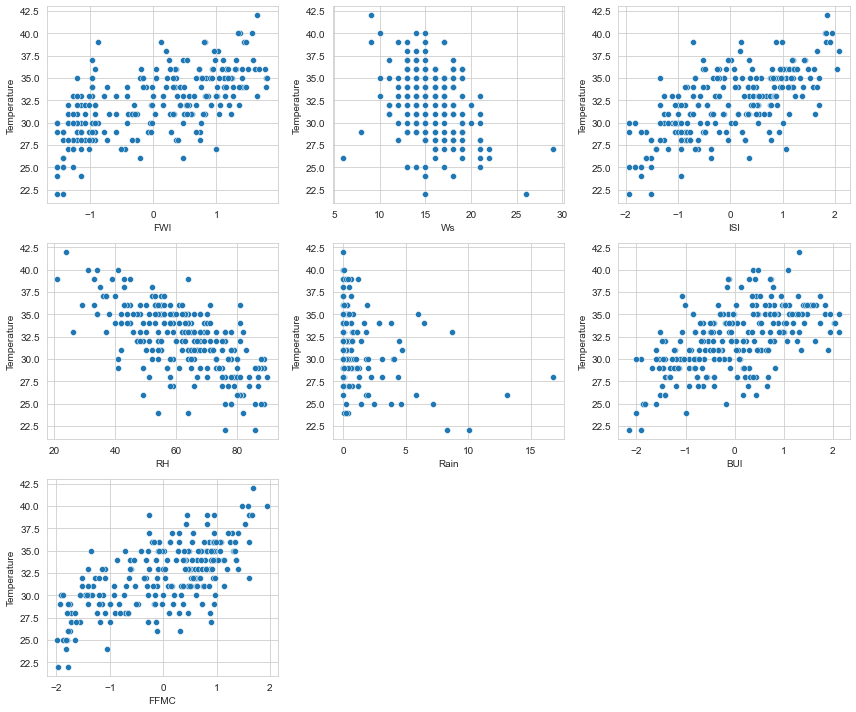

In [96]:
h=1
plt.figure(figsize=(12,10))
for cat in numeric_cols:
    plt.subplot(3,3,h)
    sns.scatterplot(df[cat],df['Temperature'])
    plt.tight_layout()
    h=h+1

In [97]:
#check for null values after transforming the data
df.isna().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           1
ISI            1
BUI            1
FWI            1
Classes        0
region         0
dtype: int64

In [98]:
df.loc[243]

Temperature    24.0
RH             64.0
Ws             15.0
Rain            0.2
FFMC            NaN
ISI             NaN
BUI             NaN
FWI             NaN
Classes         1.0
region          2.0
Name: 243, dtype: float64

In [99]:
df.dropna(inplace=True)

In [100]:
df.isna().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [101]:
df.duplicated().sum()

0

In [102]:
#model building

In [103]:
target=df['Temperature']

In [104]:
target

0      29
1      29
2      26
3      25
4      27
       ..
238    28
239    30
240    28
241    27
242    24
Name: Temperature, Length: 242, dtype: int64

In [105]:
df.drop('Temperature',axis=1,inplace=True)

In [106]:
df.head()

,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes,region
0,57,18,0.0,-1.143877,-0.875297,-1.310657,-1.134337,1.0,1
1,61,13,1.3,-1.210572,-1.056222,-1.185327,-1.199021,1.0,1
2,82,22,13.1,-1.782670,-1.606598,-1.510946,-1.424573,1.0,1
3,89,13,2.5,-1.981755,-1.936480,-1.870536,-1.513480,1.0,1
4,77,16,0.0,-1.190476,-0.932968,-1.185327,-1.134337,1.0,1


In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,target,test_size=0.30,random_state=42)

In [108]:
x_train.shape

(169, 9)

In [109]:
x_test.shape

(73, 9)

In [110]:
y_train.shape

(169,)

In [111]:
y_test.shape

(73,)

In [112]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()

In [113]:
x_train=scaling.fit_transform(x_train)

In [114]:
x_test=scaling.transform(x_test)

In [115]:
x_train

array([[-0.91478791, -0.55381762, -0.39425463, ...,  1.00313981,
        -0.893237  , -0.99410024],
       [ 1.24140674,  0.19795088,  0.42832602, ..., -1.35804491,
         1.11952371, -0.99410024],
       [-0.62729529, -1.68147037, -0.16576001, ..., -0.95946729,
         1.11952371, -0.99410024],
       ...,
       [ 0.95391412,  0.57383513,  2.89606797, ..., -1.35804491,
         1.11952371, -0.99410024],
       [-0.26792951,  0.19795088, -0.39425463, ...,  1.02341737,
        -0.893237  ,  1.00593477],
       [ 1.02578728,  2.07737213,  0.42832602, ..., -1.20541134,
         1.11952371, -0.99410024]])

In [116]:
x_test

array([[ 9.14362621e-02, -1.77933373e-01, -3.94254631e-01,
         6.55484484e-01,  5.68878155e-01,  4.84204617e-01,
         6.32862355e-01, -8.93237001e-01, -9.94100243e-01],
       [-6.27295287e-01, -9.29701873e-01, -3.94254631e-01,
         8.38583571e-01,  7.02826924e-01, -1.02622873e-01,
         5.04117861e-01, -8.93237001e-01, -9.94100243e-01],
       [-3.39802667e-01,  9.49719377e-01,  6.11121718e-01,
        -1.16824262e+00, -8.91007843e-01, -1.29045170e+00,
        -1.07434531e+00,  1.11952371e+00,  1.00593477e+00],
       [-4.83548977e-01, -5.53817623e-01, -2.11458931e-01,
        -3.44816506e-02, -2.18829083e-01,  1.09802375e+00,
         3.41796036e-01,  1.11952371e+00,  1.00593477e+00],
       [ 5.22675191e-01, -1.77933373e-01, -3.94254631e-01,
         5.04340503e-01,  3.04661908e-01,  3.91841120e-01,
         4.20151755e-01,  1.11952371e+00,  1.00593477e+00],
       [-1.84913892e+00, -5.53817623e-01, -3.94254631e-01,
         2.11856173e-01, -2.14978194e-02,  1.280499

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
regression=LinearRegression()

In [119]:
regression.fit(x_train,y_train)

LinearRegression()

In [120]:
## print the coefficients and the intercept
print(regression.coef_)

[-0.84426295 -0.56968515  0.10479557  0.89901811  3.05031891  1.68134688
 -3.74650501 -0.33209999 -0.10849341]


In [121]:
print(regression.intercept_)

32.10059171597633


In [122]:
reg_pred=regression.predict(x_test)

In [123]:
reg_pred

array([33.2555888 , 34.35953575, 29.51675905, 32.18836495, 31.70588259,
       34.30370437, 35.49568225, 34.98000268, 31.76676972, 31.56214314,
       29.09837065, 32.07216493, 32.36128785, 36.34109684, 34.26332406,
       32.36403202, 35.08848553, 26.05845578, 32.62106603, 33.84827556,
       30.51866199, 28.93216795, 34.08034991, 28.57830194, 36.61027544,
       34.23364502, 32.95135147, 33.42056976, 25.44440541, 33.09346556,
       30.92966604, 29.80193682, 32.77918871, 33.11606642, 32.18275285,
       32.13794952, 31.56654391, 34.39434387, 26.90741163, 27.07914051,
       33.63144225, 33.34506633, 34.72250351, 25.03258553, 35.96528227,
       32.62512765, 31.47354878, 30.97527817, 27.34308005, 30.19007804,
       35.9018978 , 34.3842394 , 34.44871265, 34.45992975, 33.97835616,
       31.76601727, 32.10282693, 30.47463758, 31.40057614, 35.88743078,
       32.60920075, 30.48627054, 29.17479077, 34.82666085, 31.21807905,
       33.27519605, 33.3176217 , 33.77319615, 35.59475977, 24.86

### Assumptions Of Linear Regression

In [125]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5843252459070248


In [126]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5249431381794569

In [127]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

5.530525692381333
1.9867833401032262
2.3517069741745744


In [128]:
## residuals
residuals=y_test-reg_pred

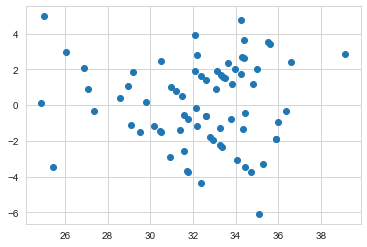

In [129]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

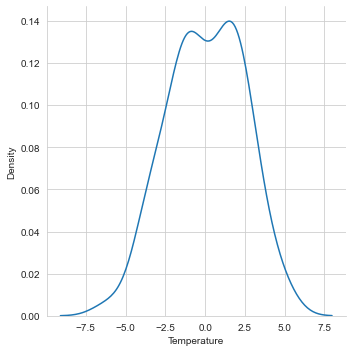

In [130]:
sns.displot(residuals,kind="kde")

Text(0, 0.5, 'Test Predicted Data')

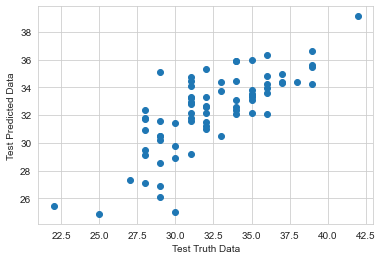

In [142]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

## Ridge regression

In [132]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [133]:
ridge.fit(x_train,y_train)

Ridge()

In [134]:
ridge_pred=ridge.predict(x_test)

In [135]:
ridge_pred

array([33.25840119, 34.3589196 , 29.60192397, 32.55922875, 31.96476369,
       34.60025896, 35.57953793, 35.18194135, 31.38372903, 31.68765251,
       28.99774777, 32.54871291, 32.35870654, 36.14528554, 34.24022031,
       32.26246859, 35.201837  , 26.59412101, 32.57575236, 33.8803349 ,
       30.40135117, 28.7945261 , 34.07195059, 28.58955558, 36.56160648,
       34.32694351, 32.95536729, 33.4614175 , 26.01595549, 33.12960127,
       30.86057483, 29.87005454, 32.78190515, 33.21790916, 32.10415257,
       31.99633612, 31.28815203, 34.58992758, 27.18947634, 27.25645268,
       33.68121703, 33.35020072, 34.78111228, 25.69309498, 36.05004713,
       32.63106848, 31.54974755, 30.74473621, 27.20282437, 29.97287724,
       35.94657112, 34.50444303, 34.40873112, 34.4421578 , 33.92868178,
       31.89466318, 31.91757944, 30.63870295, 31.58827134, 35.99164145,
       32.69083113, 30.15634594, 29.25954161, 35.11123944, 31.26895646,
       33.07858829, 33.32513516, 33.83321703, 35.80290606, 25.31

In [136]:
errors=y_test-reg_pred

In [137]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

5.530525692381333
1.9867833401032262
2.3517069741745744


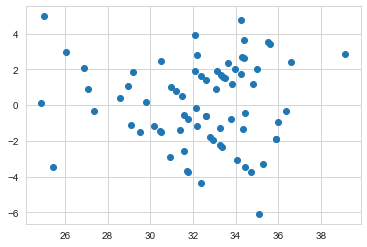

In [138]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

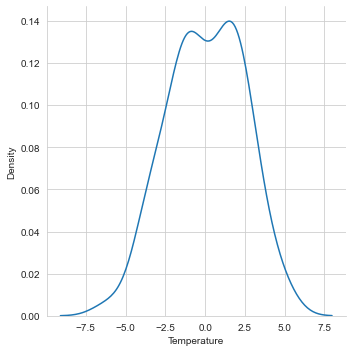

In [139]:
sns.displot(errors,kind="kde")

Text(0, 0.5, 'Test Predicted Data')

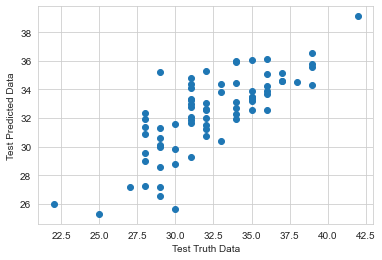

In [140]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [141]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5843252459070248


In [143]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5249431381794569

#### Ridge and linear regression predicted almost same

## Lasso regression

In [145]:
from sklearn.linear_model import Lasso

In [146]:
lasso=Lasso()

In [148]:
lasso.fit(x_train,y_train)

Lasso()

In [149]:
lasso.predict(x_test)

array([32.86193216, 33.37657983, 30.81543692, 32.25478391, 32.50285525,
       33.10891684, 33.86835319, 33.60665376, 30.88170385, 32.16702323,
       30.91763445, 32.20070931, 32.66614846, 34.45132702, 33.48684663,
       32.10668921, 32.61308455, 29.09282617, 32.49792136, 32.74111052,
       31.60179624, 29.97022447, 33.35927476, 30.32491372, 34.92867536,
       33.20431156, 32.52605882, 32.93478015, 29.13372324, 33.22952624,
       31.87931176, 30.72757457, 32.87644372, 32.9349963 , 32.24977927,
       31.8032329 , 31.7702102 , 33.1755212 , 29.33726941, 29.30347395,
       32.54652302, 32.52634143, 33.28681188, 29.10605755, 34.56101101,
       32.68725191, 32.28016912, 30.70161879, 31.29404307, 30.90474622,
       34.43810567, 33.23524478, 34.10796031, 33.19303805, 33.56092667,
       32.32531885, 31.69625338, 32.30872802, 32.25276273, 34.04963704,
       32.81542122, 31.26607074, 30.22265941, 33.37965266, 31.8032329 ,
       32.22333576, 33.11038622, 33.46095086, 34.35419559, 29.24

In [150]:
y_test

24     31
6      33
152    28
210    35
238    28
       ..
194    39
104    25
109    32
199    42
79     35
Name: Temperature, Length: 73, dtype: int64

### Assumptions Of  Regression

In [152]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5843252459070248


In [153]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5249431381794569

In [154]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

5.530525692381333
1.9867833401032262
2.3517069741745744


In [155]:
## residuals
residuals=y_test-reg_pred

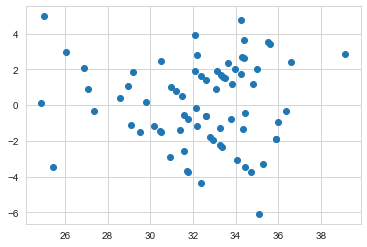

In [156]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

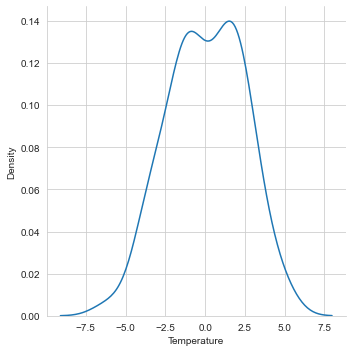

In [157]:
sns.displot(residuals,kind="kde")

Text(0, 0.5, 'Test Predicted Data')

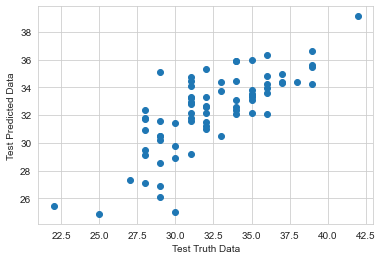

In [158]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

#### Ridge,Lasso,linear regression are compratively working same

In [159]:
### Elastic net linear regression

In [160]:
from sklearn.linear_model import ElasticNet
el=ElasticNet()

In [161]:
el.fit(x_train,y_train)

ElasticNet()

In [162]:
el.predict(x_test)

array([32.92418855, 33.41719093, 30.60795843, 32.64192663, 32.42150692,
       33.68690078, 34.26659951, 33.96189032, 30.79562844, 32.0838181 ,
       30.0570881 , 32.58490379, 32.51881814, 35.02033324, 33.95338823,
       31.89947806, 33.29004431, 28.75236867, 32.3885193 , 32.72606421,
       31.01204758, 29.77665447, 33.27124284, 30.01705702, 35.29467614,
       33.29242418, 32.5258198 , 33.11095712, 28.63448743, 33.2113796 ,
       31.61159278, 30.49506817, 32.93304416, 33.27275958, 31.8711944 ,
       31.52951001, 31.21807651, 33.49237616, 29.03156386, 29.08187673,
       32.92003286, 32.35375768, 33.54667415, 28.54048063, 34.88965682,
       32.62072574, 32.16045026, 30.67947566, 29.6782886 , 30.62205693,
       35.10064562, 33.4200808 , 34.28611669, 33.81571191, 33.76951334,
       32.47038402, 31.48845141, 31.97008596, 31.97075904, 34.59142242,
       32.67448623, 30.68122327, 30.0934415 , 33.76264387, 31.69953703,
       32.05766439, 33.17263237, 33.37240832, 34.74301671, 28.46

In [163]:
### Assumptions Of  Regression

In [164]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5843252459070248


In [165]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5249431381794569

In [166]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

5.530525692381333
1.9867833401032262
2.3517069741745744


In [167]:
## residuals
residuals=y_test-reg_pred

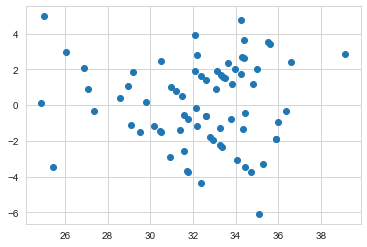

In [168]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

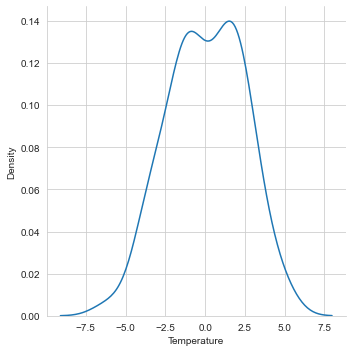

In [169]:
sns.displot(residuals,kind="kde")

Text(0, 0.5, 'Test Predicted Data')

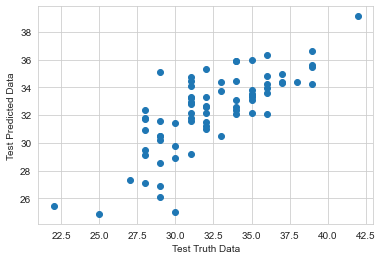

In [170]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")